# 📘 Student Success Prediction Using Machine Learning

**Student success** is a key challenge in modern education systems. Early identification of students at risk of academic failure enables institutions to take timely interventions and improve overall learning outcomes. In this notebook, we build an end-to-end machine learning pipeline to predict student success using academic and demographic features. The workflow includes EDA, data preprocessing, feature engineering, model training, and ensemble learning, with a focus on achieving robust and reliable predictions. This project demonstrates how machine learning can support data-driven decision-making in education.

As always, I hope you find this kernel useful and your UPVOTES would be highly appreciated

# Import Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score , train_test_split , learning_curve , GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_curve , auc
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/higher-education-predictors-of-student-retention")

print("Path to dataset files:", path)

/workspaces/maier_project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/thedevastator/higher-education-predictors-of-student-retention/versions/2


# Read the Dataset

In [3]:
file_path = "/home/codespace/.cache/kagglehub/datasets/thedevastator/higher-education-predictors-of-student-retention/versions/2/dataset.csv"
data = pd.read_csv(file_path ,) 
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.shape

(4424, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
data.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Check if the dataset has null values

In [7]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Count the number of every class in the output

/tmp/ipykernel_5584/301946450.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data.Target , palette='muted')


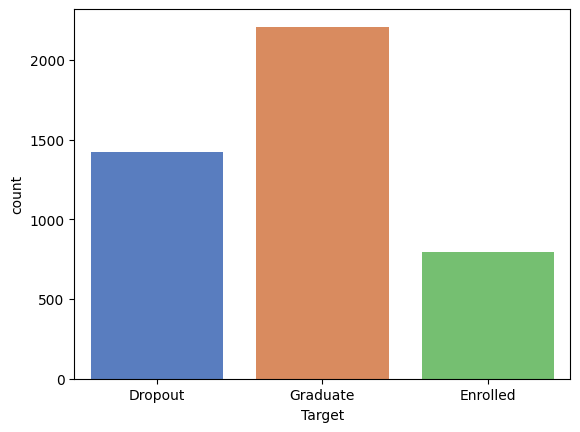

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

In [8]:
sns.countplot(x=data.Target , palette='muted')
plt.show()
data.Target.value_counts(normalize=True)

Convert Dropout = 0 , Graduate = 1 , Enrolled = 3

In [4]:
data['Target'] = data.Target.map(dict(Dropout = 0 , Graduate = 1 , Enrolled = 2))

Select only Dropout and Graduate because the number of Enrolled student is very low 

In [5]:
data = data[data['Target'] != 2]

Read the input and the output 

In [6]:
x = data.drop('Target' , axis = 1)
y = data['Target']

In [12]:
# Save the original column names for Flask app preprocessing
import joblib
original_columns = x.columns.tolist()
joblib.dump(original_columns, 'original_columns.joblib')
print(f"Saved {len(original_columns)} original column names to original_columns.joblib")
print("Columns:", original_columns)

Saved 34 original column names to original_columns.joblib
Columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [12]:
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [13]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [7]:
# apply min max scalar on x and convert the output to dataframe with the columns names 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled , columns = x.columns)

# Feature Selection 

In [8]:
from sklearn.feature_selection import SelectKBest , chi2
SelKpest = SelectKBest(chi2 , k = 15)
X_new = SelKpest.fit_transform(X_scaled , y) 
print("The new shape is :" , X_new.shape)
print(x.columns[SelKpest.get_support()].to_list())
X = X_new

The new shape is : (3630, 15)
['Marital status', 'Application mode', 'Previous qualification', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']


<Axes: >

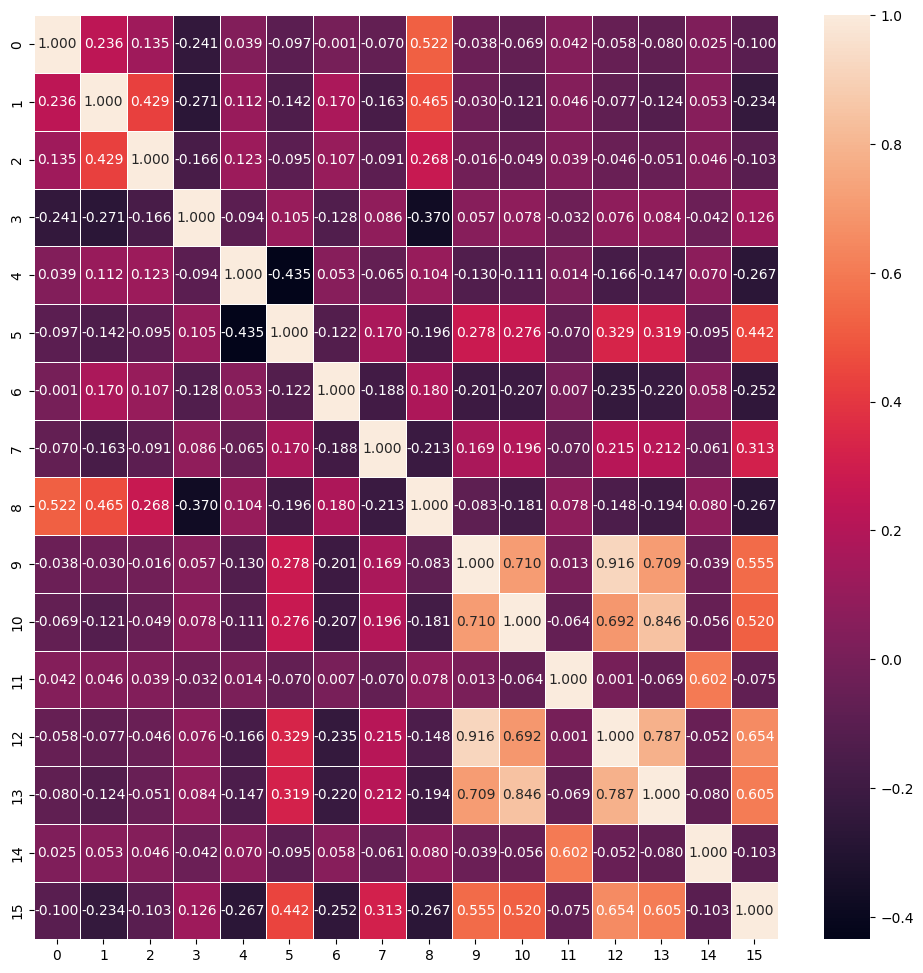

In [16]:
data = np.column_stack([X,y])
data = pd.DataFrame(data)
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(data.corr() , annot=True , linewidths = .5 , fmt = '.3f' , ax = ax)

# Data Scaling 

In [9]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit_transform(X)

# Data Splitting 

In [18]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

# Build Models

**Decision Tree**

In [19]:
model = DecisionTreeClassifier(random_state=42)
params = {
    'splitter': ["best" , "random"],
    'max_depth': np.arange(1,101),
    'min_samples_leaf': np.arange(1,5,1),
    'min_samples_split': np.arange(2,5,1)
}

cv_dt = GridSearchCV(model , param_grid=params , scoring="accuracy" , n_jobs=-1 , cv=5)
cv_dt.fit(x_train , y_train)
best_DT = cv_dt.best_estimator_ 
y_pred = best_DT.predict(x_test)
print(cv_dt.best_params_ , cv_dt.best_score_)

{'max_depth': np.int64(2), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'splitter': 'best'} 0.8829242091518784


In [20]:
# print the classification report 
print(classification_report(y_test , y_pred , digits=4))

              precision    recall  f1-score   support

           0     0.8831    0.8327    0.8571       245
           1     0.9172    0.9439    0.9303       481

    accuracy                         0.9063       726
   macro avg     0.9001    0.8883    0.8937       726
weighted avg     0.9057    0.9063    0.9056       726



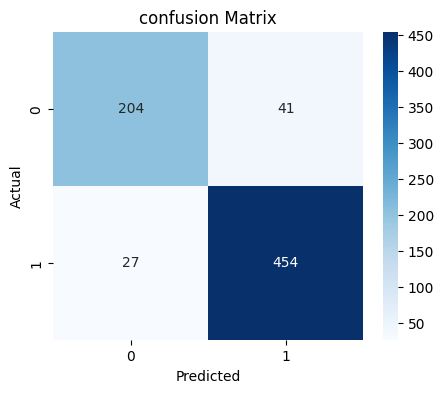

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

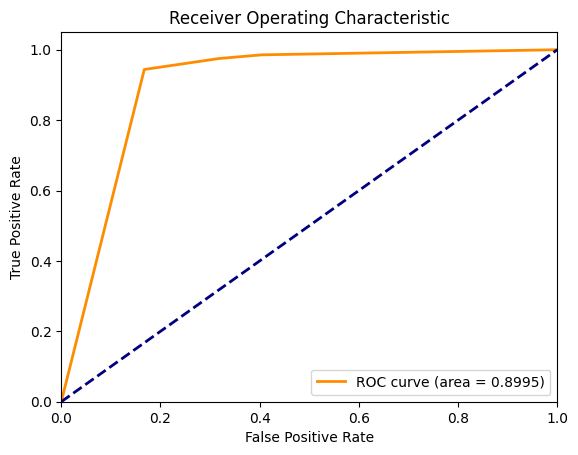

In [22]:
# Draw the roc curve and auc using the results 
# ROC AND AUC 
y_pred_proba = best_DT.predict_proba(x_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)
roc_auc = auc(fpr , tpr)

plt.figure()
plt.plot(fpr , tpr , color = 'darkorange' , lw = 2 , label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1] , [0,1] , color = 'navy' , lw = 2 , linestyle='--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Random Forest Implementation**

In [23]:
model = RandomForestClassifier(random_state=42)
params = {
    'n_estimators':np.arange(100,500,100)
    }
cv_rf = GridSearchCV(model , param_grid=params , scoring='accuracy' , n_jobs=-1 , cv = 5 , verbose=3)
cv_rf.fit(x_train, y_train)
best_RF = cv_rf.best_estimator_
y_pred = best_RF.predict(x_test)
print(cv_rf.best_params_ , cv_rf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 2/5] END ..................n_estimators=100;, score=0.883 total time=   0.4s
[CV 1/5] END ..................n_estimators=100;, score=0.888 total time=   0.4s
[CV 3/5] END ..................n_estimators=100;, score=0.888 total time=   0.4s
[CV 4/5] END ..................n_estimators=100;, score=0.854 total time=   0.4s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.4s
[CV 1/5] END ..................n_estimators=200;, score=0.886 total time=   0.7s
[CV 2/5] END ..................n_estimators=200;, score=0.883 total time=   0.8s
[CV 3/5] END ..................n_estimators=200;, score=0.893 total time=   0.8s
[CV 4/5] END ..................n_estimators=200;, score=0.857 total time=   0.7s
[CV 5/5] END ..................n_estimators=200;, score=0.903 total time=   0.8s
[CV 1/5] END ..................n_estimators=300;, score=0.886 total time=   1.6s
[CV 2/5] END ..................n_estimators=300;,

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       245
           1       0.93      0.95      0.94       481

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



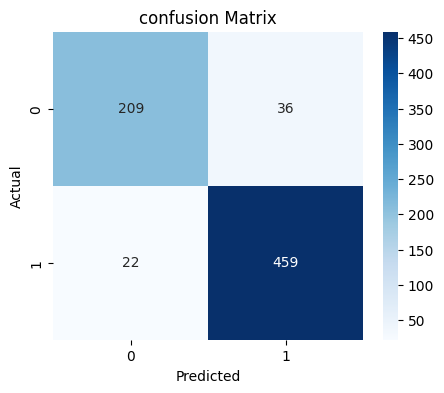

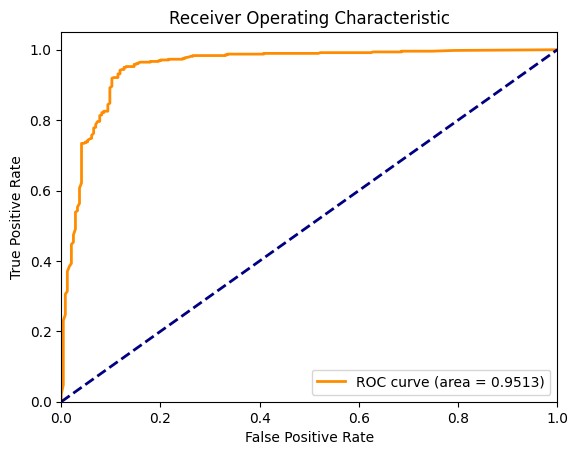

In [24]:
# print the classification report and confusion matrix using heatmap 

print(classification_report(y_test , y_pred))
cm = confusion_matrix(y_test , y_pred) 
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Draw the roc curve and auc using the results 
# ROC AND AUC 
y_pred_proba = best_RF.predict_proba(x_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)
roc_auc = auc(fpr , tpr)

plt.figure()
plt.plot(fpr , tpr , color = 'darkorange' , lw = 2 , label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1] , [0,1] , color = 'navy' , lw = 2 , linestyle='--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


**XGBoost Classifier**

In [25]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# ===============================
# Parameters Grid
# ===============================
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# ===============================
# XGBoost Model
# ===============================
xgb = XGBClassifier(
    learning_rate=0.02,
    n_estimators=600,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# ===============================
# Stratified K-Fold
# ===============================
cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=1001
)

# ===============================
# Randomized Search
# ===============================
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=5,
    scoring='roc_auc',   # أفضل من accuracy
    cv=cv,
    verbose=3,
    random_state=1001,
    n_jobs=-1
)
# ===============================
# Fit
# ===============================
random_search.fit(x_train, y_train)

# ===============================
# Results
# ===============================
best_XGB = random_search.best_estimator_
y_pred = best_XGB.predict(x_test)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 2/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.933 total time=   0.2s
[CV 1/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.939 total time=   0.2s
[CV 3/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.932 total time=   0.1s


[CV 1/3] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.936 total time=   0.3s
[CV 2/3] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.940 total time=   0.3s
[CV 1/3] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.935 total time=   0.3s
[CV 3/3] END colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.6;, score=0.934 total time=   0.3s
[CV 2/3] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.937 total time=   0.3s
[CV 2/3] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.934 total time=   0.2s
[CV 3/3] END colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8;, score=0.934 total time=   0.3s
[CV 3/3] END colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0;, score=0.932 total time=   0.2s
[C

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       245
           1       0.93      0.96      0.94       481

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



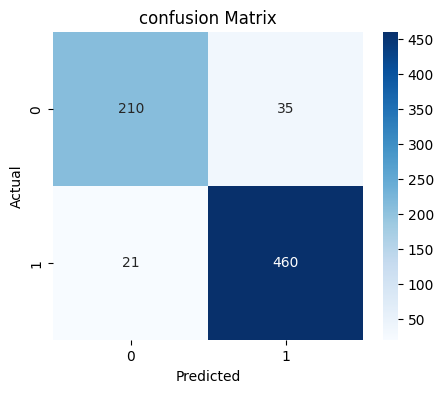

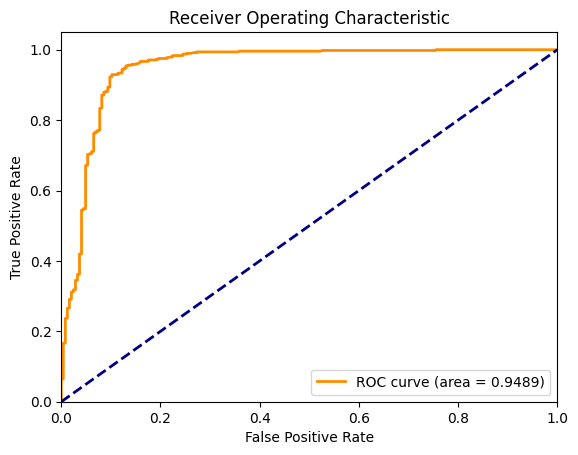

In [26]:
# print the classification report and confusion matrix using heatmap 

print(classification_report(y_test , y_pred))
cm = confusion_matrix(y_test , y_pred) 
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Draw the roc curve and auc using the results 
# ROC AND AUC 
y_pred_proba = best_XGB.predict_proba(x_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)
roc_auc = auc(fpr , tpr)

plt.figure()
plt.plot(fpr , tpr , color = 'darkorange' , lw = 2 , label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1] , [0,1] , color = 'navy' , lw = 2 , linestyle='--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Voting Classifier**

In [27]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[
    ('svm',SVC(probability=True)),
    ('lr',LogisticRegression()),
] , voting='soft')

params = {
    'lr__C':[1.0 , 100.0],
    'svm__C':[2,3,4]
}

grid = GridSearchCV(estimator=eclf , param_grid=params , cv=5 , n_jobs=-1 , verbose=3)

grid.fit(x_train , y_train)
print(grid.best_params_)
best_VC = grid.best_estimator_
y_pred = best_VC.predict(x_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 1/5] END ...............lr__C=1.0, svm__C=2;, score=0.895 total time=   0.7s
[CV 2/5] END ...............lr__C=1.0, svm__C=2;, score=0.888 total time=   0.7s
[CV 4/5] END ...............lr__C=1.0, svm__C=2;, score=0.855 total time=   0.6s
[CV 3/5] END ...............lr__C=1.0, svm__C=2;, score=0.897 total time=   0.7s
[CV 5/5] END ...............lr__C=1.0, svm__C=2;, score=0.902 total time=   0.7s
[CV 1/5] END ...............lr__C=1.0, svm__C=3;, score=0.897 total time=   0.7s
[CV 3/5] END ...............lr__C=1.0, svm__C=3;, score=0.898 total time=   0.7s
[CV 2/5] END ...............lr__C=1.0, svm__C=3;, score=0.888 total time=   0.7s
[CV 4/5] END ...............lr__C=1.0, svm__C=3;, score=0.852 total time=   0.7s
[CV 5/5] END ...............lr__C=1.0, svm__C=3;, score=0.902 total time=   0.7s
[CV 1/5] END ...............lr__C=1.0, svm__C=4;, score=0.895 total time=   0.9s
[CV 2/5] END ...............lr__C=1.0, svm__C=4;, score=0.888 total time=   1.0s
[CV 3/5] END ...............

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       245
           1       0.93      0.95      0.94       481

    accuracy                           0.92       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



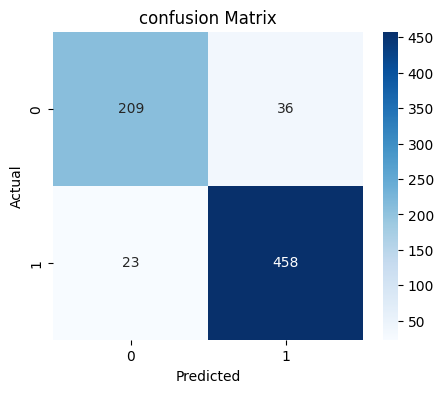

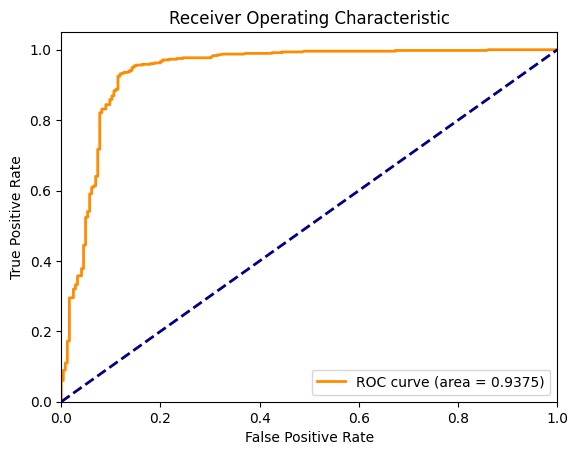

In [28]:
# print the classification report and confusion matrix using heatmap 

print(classification_report(y_test , y_pred))
cm = confusion_matrix(y_test , y_pred) 
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Draw the roc curve and auc using the results 
# ROC AND AUC 
y_pred_proba = best_VC.predict_proba(x_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)
roc_auc = auc(fpr , tpr)

plt.figure()
plt.plot(fpr , tpr , color = 'darkorange' , lw = 2 , label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1] , [0,1] , color = 'navy' , lw = 2 , linestyle='--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Stacking Classifier**

In [29]:
# ===============================
# Imports
# ===============================
from sklearn.ensemble import (
    StackingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ===============================
# Base models (Level 0)
# ===============================
level0 = []

level0.append((
    'LR',
    LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='liblinear',
        max_iter=1000
    )
))

level0.append((
    'RF',
    RandomForestClassifier(
        n_estimators=300,
        random_state=42
    )
))

level0.append((
    'DT',
    DecisionTreeClassifier(
        max_depth=6,
        min_samples_leaf=1,
        min_samples_split=2,
        splitter='random',
        random_state=42
    )
))

level0.append((
    'SGD',
    SGDClassifier(
        alpha=0.01,
        max_iter=1000,
        random_state=42
    )
))

level0.append((
    'XGB',
    XGBClassifier(
        subsample=0.8,
        min_child_weight=5,
        max_depth=5,
        gamma=1,
        colsample_bytree=0.8,
        n_estimators=200,
        learning_rate=0.1,
        eval_metric='logloss',
        random_state=42
    )
))

level0.append((
    'AdaBoost',
    AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=6,
            min_samples_leaf=1,
            min_samples_split=2,
            splitter='random',
            random_state=42
        ),
        n_estimators=100,
        learning_rate=0.5,
        random_state=42
    )
))

level0.append((
    'Bagging',
    BaggingClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=6,
            min_samples_leaf=1,
            min_samples_split=2,
            splitter='random',
            random_state=42
        ),
        n_estimators=100,
        random_state=42
    )
))

# ===============================
# Meta model (Level 1)
# ===============================
level1 = SVC(
    C=0.8,
    gamma=0.04,
    kernel='rbf',
    probability=True,
    random_state=42
)

# ===============================
# Stacking Classifier
# ===============================
model = StackingClassifier(
    estimators=level0,
    final_estimator=level1,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# ===============================
# Train & Predict
# ===============================
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

/workspaces/maier_project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/workspaces/maier_project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/workspaces/maier_project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be re

              precision    recall  f1-score   support

           0     0.9269    0.8286    0.8750       245
           1     0.9172    0.9667    0.9413       481

    accuracy                         0.9201       726
   macro avg     0.9221    0.8977    0.9081       726
weighted avg     0.9205    0.9201    0.9189       726



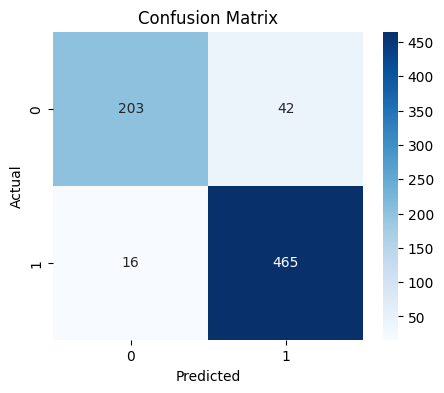

In [30]:
# print the classification report and the confusion matrix 
print(classification_report(y_test , y_pred , digits=4))

cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True , fmt='d' , cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
model = SVC(probability=True)
params = {
    'kernel':['linear' , 'rbf'],
    'C':np.arange(0.5,1,0.1) ,
    'gamma':np.arange(0.01 ,0.05 , 0.01)
}
cv_svm = GridSearchCV(model , param_grid=params , scoring='accuracy' , n_jobs=-1 , cv=5)
cv_svm.fit(x_train , y_train)
best_SVM = cv_svm.best_estimator_
y_pred = best_SVM.predict(x_test)
print(cv_svm.best_params_ , cv_svm.best_score_)

{'C': np.float64(0.7), 'gamma': np.float64(0.04), 'kernel': 'rbf'} 0.88361149029616


              precision    recall  f1-score   support

           0       0.88      0.83      0.85       245
           1       0.92      0.94      0.93       481

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



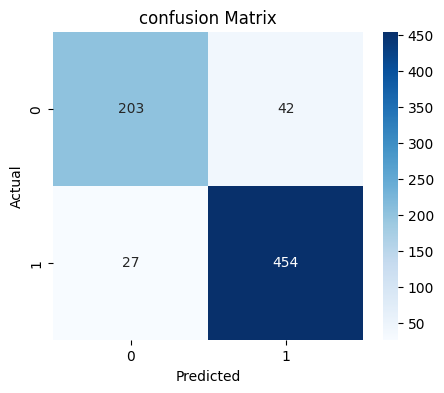

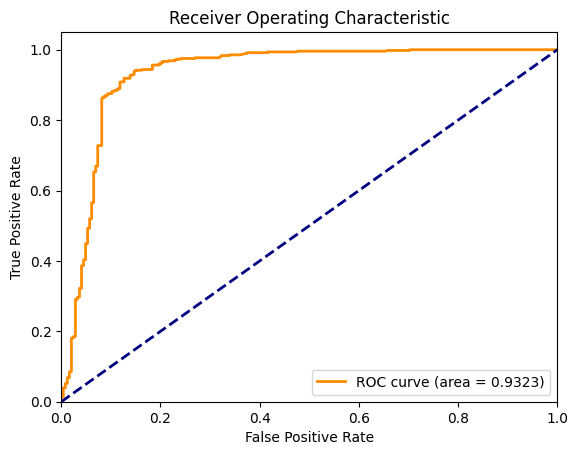

In [32]:
# print the classification report and confusion matrix using heatmap 

print(classification_report(y_test , y_pred))
cm = confusion_matrix(y_test , y_pred) 
plt.figure(figsize=(5,4))
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Draw the roc curve and auc using the results 
# ROC AND AUC 
y_pred_proba = best_SVM.predict_proba(x_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)
roc_auc = auc(fpr , tpr)

plt.figure()
plt.plot(fpr , tpr , color = 'darkorange' , lw = 2 , label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1] , [0,1] , color = 'navy' , lw = 2 , linestyle='--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Adaboost , XGboost = 92.5%  Is the Best Classifier

## Export the Best Model for Flask

We will export the best performing model (e.g., XGBoost or AdaBoost) using `joblib`, so it can be loaded and used in a Flask API for predictions.

In [33]:
# Export the best model (e.g., XGBoost) using joblib
import joblib

# Save the best model to a file
joblib.dump(best_XGB, 'best_student_success_model.joblib')
print('Model exported as best_student_success_model.joblib')

Model exported as best_student_success_model.joblib


In [11]:
# Save the preprocessing objects for Flask
import joblib

# Save MinMaxScaler
joblib.dump(scaler, 'minmax_scaler.joblib')
print('MinMaxScaler saved as minmax_scaler.joblib')

# Save SelectKBest
joblib.dump(SelKpest, 'selectkbest.joblib')
print('SelectKBest saved as selectkbest.joblib')

# Save StandardScaler
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X_new)
joblib.dump(standard_scaler, 'standard_scaler.joblib')
print('StandardScaler saved as standard_scaler.joblib')

# Save feature names for Flask
feature_names = x.columns[SelKpest.get_support()].to_list()
joblib.dump(feature_names, 'feature_names.joblib')
print('Feature names saved as feature_names.joblib')
print('Features:', feature_names)

# Generate categorical feature mappings from original data
categorical_features = {
    'Marital status': sorted(data['Marital status'].unique().tolist()),
    'Application mode': sorted(data['Application mode'].unique().tolist()),
    'Previous qualification': sorted(data['Previous qualification'].unique().tolist()),
    'Displaced': sorted(data['Displaced'].unique().tolist()),
    'Debtor': sorted(data['Debtor'].unique().tolist()),
    'Tuition fees up to date': sorted(data['Tuition fees up to date'].unique().tolist()),
    'Gender': sorted(data['Gender'].unique().tolist()),
    'Scholarship holder': sorted(data['Scholarship holder'].unique().tolist()),
}

# Save categorical feature mappings
joblib.dump(categorical_features, 'categorical_features.joblib')
print('Categorical features mapping saved as categorical_features.joblib')
print('Categorical features:', categorical_features)

MinMaxScaler saved as minmax_scaler.joblib
SelectKBest saved as selectkbest.joblib
StandardScaler saved as standard_scaler.joblib
Feature names saved as feature_names.joblib
Features: ['Marital status', 'Application mode', 'Previous qualification', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']
Categorical features mapping saved as categorical_features.joblib
Categorical features: {'Marital status': [1, 2, 3, 4, 5, 6], 'Application mode': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'Previous qualification': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'Displaced': [0, 1], 'Debtor': [0, 1], 'Tuition fees up to date': [0, 1], 'Gender': [0, 1], 'Schola

### How to Use the Exported Model in Flask

1. Copy the exported file `best_student_success_model.joblib` to your Flask project directory.
2. In your Flask app, load the model using `joblib.load()`.
3. Preprocess input data in the same way as in this notebook (scaling, feature selection, etc.).
4. Use the loaded model to make predictions.

#### Example Flask Usage:
```python
import joblib
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)
model = joblib.load('best_student_success_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    # Preprocess data as done in the notebook
    # x = ... (scaling, feature selection, etc.)
    prediction = model.predict(np.array([data['features']]))
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)
```
> **Note:** Ensure your Flask app preprocesses input data exactly as in the notebook before prediction.